# WIP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import model_comp as mc 

folder = '/Users/danielferreira/Documents/git/pySETTV/06 - Utility & References/Data'
file = 'player_batting_enriched.csv'
index = 'player_id'
bat = pd.read_csv(folder+'/'+file, index_col=index)
train = bat[bat['year']==2021]
test = bat[bat['year']==2022]
y_train = train['hr_10'].copy()
y_test = test['hr_10'].copy()

In [ ]:
# Model 1 - Logistic Regression without the variable that contains missing
X_train = train[['ab', 'batting_avg','r_total_stolen_base']].copy()
X_test = test[['ab', 'batting_avg','r_total_stolen_base']].copy()

model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1_pred_train = model1.predict(X_train)
model1_prob_train = model1.predict_proba(X_train)[:,1]
model1_pred_test = model1.predict(X_test)
model1_prob_test = model1.predict_proba(X_test)[:,1]


# Model 2 - KNN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
model2_pred_train = model2.predict(X_train)
model2_prob_train = model2.predict_proba(X_train)[:,1]
model2_pred_test = model2.predict(X_test)
model2_prob_test = model2.predict_proba(X_test)[:,1]

# Model 3 - Logistic Regression with missing imputation
X_train = train[['ab','exit_velocity_avg', 'batting_avg','r_total_stolen_base']].copy()
X_train['exit_velocity_avg'] = X_train['exit_velocity_avg'].fillna(X_train['exit_velocity_avg'].median())
X_test = test[['ab','exit_velocity_avg', 'batting_avg','r_total_stolen_base']].copy()
X_test['exit_velocity_avg'] = X_test['exit_velocity_avg'].fillna(X_test['exit_velocity_avg'].median())

model3 = LogisticRegression()
model3.fit(X_train, y_train)
model3_pred = model3.predict(X_test)
model3_prob = model3.predict_proba(X_test)

# Model 4 - Decision Tree
model4 = DecisionTreeClassifier(max_depth=3, min_samples_split=30, min_samples_leaf = 20, max_features=3)
model4.fit(X_train, y_train)
model4_pred = model4.predict(X_test)
model4_prob = model4.predict_proba(X_test)

# Model 5 - Random Forest
model5 = RandomForestClassifier(random_state=42)
model5.fit(X_train,y_train)
model5_pred = model5.predict(X_test)
model5_prob = model5.predict_proba(X_test)

In [ ]:
import model_comp as mc 
problem = mc.Problem(y_test, "2022 Home Runs")

In [4]:
models = {
    "Logistic Regression without imputation": model1_pred,
    "KNN": model2_pred,
    "Logistic Regression with imputation": model3_pred,
    "Decision Tree": model4_pred,
    "Random Forest": model5_pred
}

# Iterate over the dictionary
for name, pred in models.items():
    print(f'\n{name}\n')
    problem.stats_print(pred)



Logistic Regression without imputation

Accuracy: 0.854
Miss Rate: 0.146
Precision (Class 1): 0.741
Precision (Class 0): 0.916
Recall (Class 1): 0.828
Recall (Class 0): 0.866

KNN

Accuracy: 0.839
Miss Rate: 0.161
Precision (Class 1): 0.692
Precision (Class 0): 0.938
Recall (Class 1): 0.882
Recall (Class 0): 0.818

Logistic Regression with imputation

Accuracy: 0.877
Miss Rate: 0.123
Precision (Class 1): 0.775
Precision (Class 0): 0.933
Recall (Class 1): 0.863
Recall (Class 0): 0.884

Decision Tree

Accuracy: 0.835
Miss Rate: 0.165
Precision (Class 1): 0.708
Precision (Class 0): 0.909
Recall (Class 1): 0.819
Recall (Class 0): 0.843

Random Forest

Accuracy: 0.863
Miss Rate: 0.137
Precision (Class 1): 0.754
Precision (Class 0): 0.923
Recall (Class 1): 0.843
Recall (Class 0): 0.873


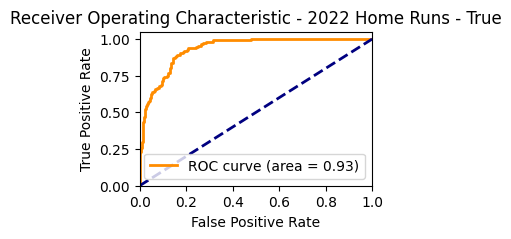

In [5]:
problem.roc_plot(model1_prob, y_test)

In [6]:
problem.all_stats(model1_pred, model1_prob, y_test)

[np.float64(0.9339460784313725),
 np.float64(0.8540372670807453),
 np.float64(0.14596273291925466),
 np.float64(0.7412280701754386),
 np.float64(0.9158653846153846),
 np.float64(0.8284313725490197),
 np.float64(0.865909090909091),
 np.float64(0.7824074074074074),
 np.float64(0.8901869158878505),
 np.float64(0.10235604669628749),
 0.3185214076545152]